<a href="https://colab.research.google.com/github/arnabsaha7/Heart-Attack-Prediction-Data-Analysis/blob/main/Heart_Attack_Using_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pyspark

In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [11]:
spark

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import matplotlib.pyplot as plt
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col,sum
import seaborn as sns
from pyspark.sql.types import IntegerType


In [14]:
df = spark.read.csv('/content/heart.csv', header=True)

In [15]:
df.show(5)

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
only showing top 5 rows



# Exploratory Data Analysis

In [16]:
print("Sex Male count ",df.filter(df['sex']==1).select('sex').count())
print("LSex Female count ",df.filter(df['sex']==0).select('sex').count())

Sex Male count  207
LSex Female count  96


In [18]:
# doing statistical analysis for Male
df.filter(df['sex']==1).describe().show()

+-------+-----------------+---+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              age|sex|                cp|            trtbps|              chol|                fbs|           restecg|          thalachh|              exng|           oldpeak|               slp|               caa|             thall|            output|
+-------+-----------------+---+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              207|207|               207|               207|               207|                207|               207|               207|               207|               207|               207|              

In [19]:
# doing statistical analysis for Female
df.filter(df['sex']==0).describe().show()

+-------+------------------+---+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|               age|sex|                cp|            trtbps|             chol|               fbs|           restecg|          thalachh|               exng|           oldpeak|               slp|               caa|              thall|             output|
+-------+------------------+---+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+
|  count|                96| 96|                96|                96|               96|                96|                96|                96|                 96|                96|                96|        

In [30]:
df.groupBy('chol').agg({'cp': 'Sum'}).show(5)

+----+-------+
|chol|sum(cp)|
+----+-------+
| 307|    0.0|
| 205|    1.0|
| 169|    0.0|
| 234|    7.0|
| 232|    3.0|
+----+-------+
only showing top 5 rows



In [31]:
df.groupBy('age').agg({'chol': 'Sum'}).show(5)

+---+---------+
|age|sum(chol)|
+---+---------+
| 51|   3104.0|
| 54|   4053.0|
| 69|    727.0|
| 29|    204.0|
| 42|   1974.0|
+---+---------+
only showing top 5 rows



In [34]:
df.groupBy('cp').agg({'chol': 'Sum'}).show(5)

+---+---------+
| cp|sum(chol)|
+---+---------+
|  3|   5454.0|
|  0|  35769.0|
|  1|  12239.0|
|  2|  21156.0|
+---+---------+



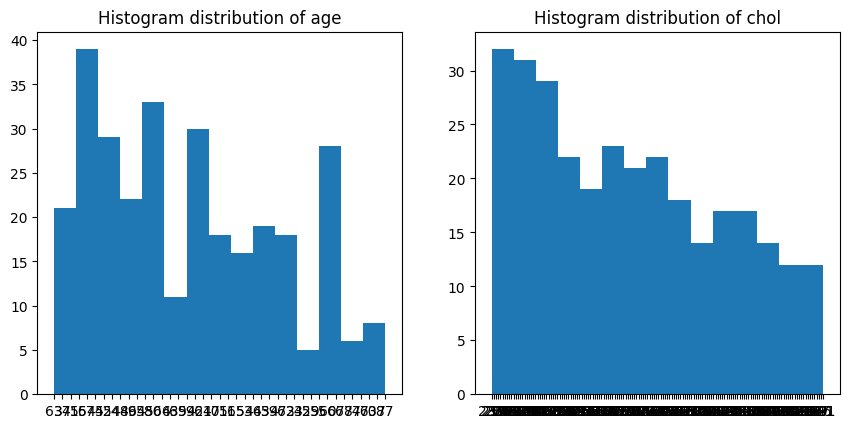

In [35]:
df_pandas = df.toPandas()
numeric_columns = ['age', 'chol']

plt.figure(figsize=(16, 12))
for i, column in zip(range(1, 11), numeric_columns):
    plt.subplot(4, 3, i)
    plt.subplots_adjust(right=0.9, top=1.5)
    plt.hist(df_pandas[column], bins=15)
    plt.title('Histogram distribution of {}'.format(column))
plt.show()

In [37]:
def pieplot(df, col, lim=10, yname=None):
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    pd_df = classes.limit(lim).toPandas()
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False,subplots= True)
    plt.title('Piechart analysis of {}'.format(col))
    plt.show()

<Figure size 1600x1200 with 0 Axes>

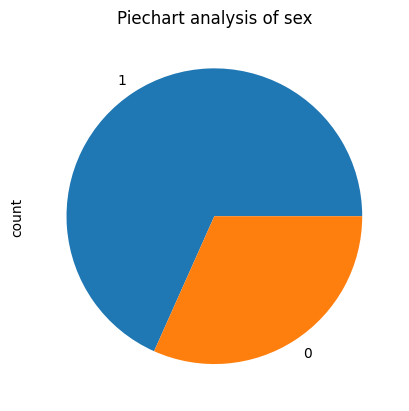

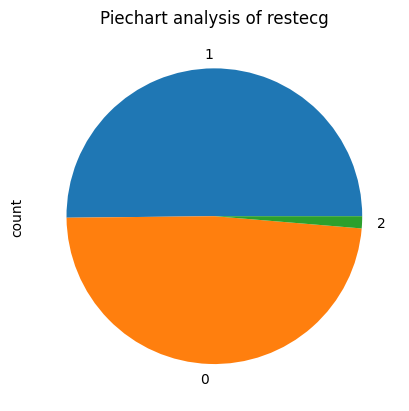

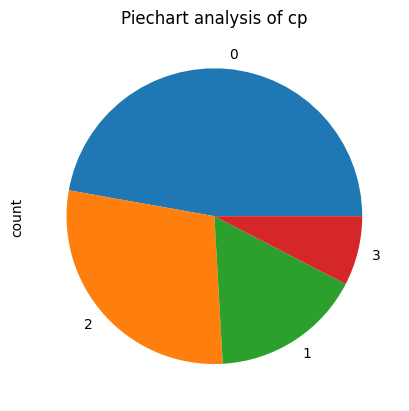

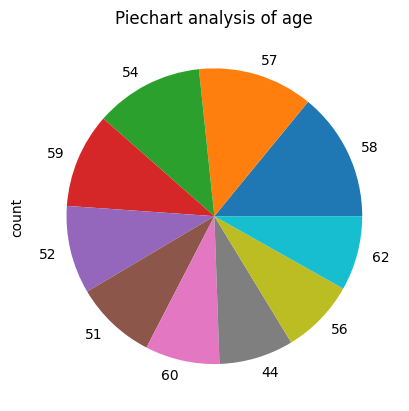

In [38]:
columns_cat=['sex', 'restecg', 'cp','age']
plt.figure(figsize=(16,12))

for column in columns_cat:
  pieplot(df, column)

In [39]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trtbps    303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalachh  303 non-null    object
 8   exng      303 non-null    object
 9   oldpeak   303 non-null    object
 10  slp       303 non-null    object
 11  caa       303 non-null    object
 12  thall     303 non-null    object
 13  output    303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [40]:
import pandas as pd
numeric_columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
                   'oldpeak','slp','caa','thall','output']

# Convert columns to numeric
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')  # Use errors='coerce' to handle non-convertible values

# Check the data types after conversion
print(df_pandas.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


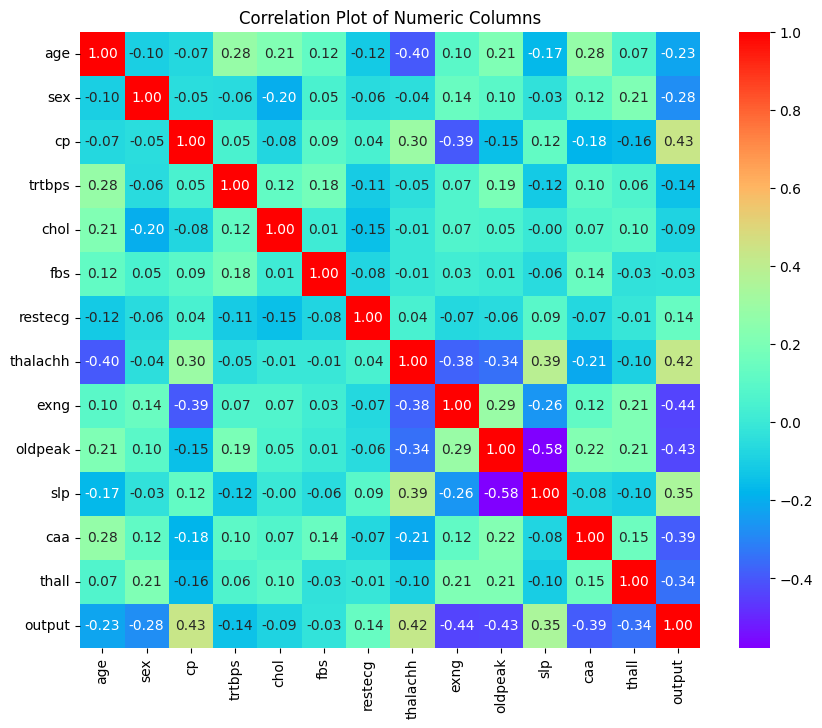

In [43]:
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')  # Use errors='coerce' to handle non-convertible values

# Calculate correlation matrix
correlation_matrix = df_pandas[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Plot of Numeric Columns')
plt.show()

# Data preprocessing and investigation

In [44]:
df.count() # number of rows

303

In [45]:
df= df.dropDuplicates()
print(df.count())

302


In [46]:
df = df.drop("ID")

In [47]:
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- cp: string (nullable = true)
 |-- trtbps: string (nullable = true)
 |-- chol: string (nullable = true)
 |-- fbs: string (nullable = true)
 |-- restecg: string (nullable = true)
 |-- thalachh: string (nullable = true)
 |-- exng: string (nullable = true)
 |-- oldpeak: string (nullable = true)
 |-- slp: string (nullable = true)
 |-- caa: string (nullable = true)
 |-- thall: string (nullable = true)
 |-- output: string (nullable = true)



In [48]:
from pyspark.sql.types import StringType, BooleanType, IntegerType, FloatType

numeric_cols=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
                   'oldpeak','slp','caa','thall','output']

for column in numeric_cols:
    df = df.withColumn(column,F.col(column).cast(IntegerType()))

In [49]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: integer (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [50]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|               age|                sex|                cp|            trtbps|             chol|                fbs|           restecg|          thalachh|               exng|           oldpeak|               slp|               caa|             thall|             output|
+-------+------------------+-------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|  count|               302|                302|               302|               302|              302|                302|               302|               302| 

## Dealing with missing values

In [51]:
# Check For missing values
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|  0|  0|  0|     0|   0|  0|      0|       0|   0|      0|  0|  0|    0|     0|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+



In [52]:
from pyspark.sql.functions import avg

#checking for missing values, computing the mean and filling the missing values


def compute_mean(data, cols_numeric, verbose=False):
    mean_value_of_column=[]
    for col in cols_numeric:
        mean_value = data.select(avg(data[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()

        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        mean_value_of_column.append([col, res[0]])
    return mean_value_of_column

In [53]:
from pyspark.sql.functions import when, lit

def filling_numerical_column(data, numeric_cols):
    column_mean = compute_mean(data, numeric_cols)
    for i, mean in column_mean:
        data = data.withColumn(i, when(data[i].isNull()==True,
        lit(mean)).otherwise(data[i]))
    return data

In [54]:
num_cols=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
                   'oldpeak','slp','caa','thall','output']
df = filling_numerical_column(df, num_cols)

In [55]:
def filling_categorical_column(data, list_cat_columns, verbose=False):
    fil_cat_col=[]
    for col in list_cat_columns:
        data = data.filter(data[col].isNull()==False)
        unique_classes = data.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values=[]
        for uc in unique_classes:
             unique_values.append([uc, data.filter(data[col]==uc).count()])
        sorted_unique_values= sorted(unique_values, key = lambda x: x[1], reverse =True)

        if (verbose==True): print(col, sorted_unique_values, " and mode is ", sorted_unique_values[0][0])
        fil_cat_col.append([col, sorted_unique_values[0][0]])
    return fil_cat_col

In [56]:
list_cat_columns=['sex','cp','restecg','fbs','caa','thall']
filling_categorical_column(df, list_cat_columns, verbose=True)

sex [[1.0, 206], [0.0, 96]]  and mode is  1.0
cp [[0.0, 143], [2.0, 86], [1.0, 50], [3.0, 23]]  and mode is  0.0
restecg [[1.0, 151], [0.0, 147], [2.0, 4]]  and mode is  1.0
fbs [[0.0, 257], [1.0, 45]]  and mode is  0.0
caa [[0.0, 175], [1.0, 65], [2.0, 38], [3.0, 20], [4.0, 4]]  and mode is  0.0
thall [[2.0, 165], [3.0, 117], [1.0, 18], [0.0, 2]]  and mode is  2.0


[['sex', 1.0],
 ['cp', 0.0],
 ['restecg', 1.0],
 ['fbs', 0.0],
 ['caa', 0.0],
 ['thall', 2.0]]

In [57]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|  0|  0|  0|     0|   0|  0|      0|       0|   0|      0|  0|  0|    0|     0|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+

